In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Import the dataset

In [4]:
train = pd.read_csv(r"D:\Imarticus\PGDA_43\Hackathon\train.csv")
test = pd.read_csv(r"D:\Imarticus\PGDA_43\Hackathon\employee_test__1_.csv-1756126132103")
sample= pd.read_csv(r'D:\Imarticus\PGDA_43\Hackathon\sample_submission.csv')

In [5]:
train.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
test.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/29/2014 11:32,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,5-Jan,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,8/29/2014 11:32,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,8/29/2014 11:33,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,8/29/2014 11:34,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,8/29/2014 11:36,36,Male,United States,FL,No,No,Never,5-Jan,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [7]:
sample.head()

,S.No,treatment
0,1,Yes
1,2,No
2,3,Yes
3,4,No
4,5,Yes


In [8]:
print('Train Shape =', train.shape)
print('Test Shape =', test.shape)

Train Shape = (1048, 28)
Test Shape = (210, 27)


## EDA

In [9]:
train.treatment.value_counts(normalize= True) * 100

treatment
No     51.145038
Yes    48.854962
Name: proportion, dtype: float64

## Checking for Duplicates

In [10]:
train[train.duplicated()]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


## Checking for Missing values

In [11]:
miss_val = train.isnull().sum()


In [12]:
miss_val[miss_val > 0]

state               412
self_employed        18
work_interfere      236
benefits             13
wellness_program      4
leave                 4
comments            916
dtype: int64

In [13]:
train.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

| Variable Name                   | Description                                                        | Data Type     | Possible Values / Format                                                           |
| ------------------------------- | ------------------------------------------------------------------ | ------------- | ---------------------------------------------------------------------------------- |
| **S.No**                        | Serial number; unique ID for each entry                            | `Integer`     | e.g., 1, 2, 3...                                                                   |
| **Timestamp**                   | Date and time the survey was submitted                             | `Datetime`    | e.g., `2023-05-15 10:32`                                                           |
| **Age**                         | Age of the respondent                                              | `Integer`     | e.g., 25, 32                                                                       |
| **Gender**                      | Gender identity                                                    | `String`      | e.g., "Male", "Female", "Non-binary", etc.                                         |
| **Country**                     | Country of residence                                               | `String`      | e.g., "United States", "India"                                                     |
| **state**                       | U.S. state of residence (if applicable)                            | `String`      | e.g., "CA", "NY", null                                                             |
| **self\_employed**              | Whether self-employed                                              | `Categorical` | "Yes", "No", null                                                                  |
| **family\_history**             | Family history of mental illness                                   | `Categorical` | "Yes", "No"                                                                        |
| **treatment**                   | Has sought treatment                                               | `Categorical` | "Yes", "No"                                                                        |
| **work\_interfere**             | Mental health interfered with work                                 | `Categorical` | "Never", "Rarely", "Sometimes", "Often", null                                      |
| **no\_employees**               | Company size                                                       | `Categorical` | "1-5", "6-25", ..., "More than 1000"                                               |
| **remote\_work**                | Works remotely                                                     | `Categorical` | "Yes", "No"                                                                        |
| **tech\_company**               | Works in a tech company                                            | `Categorical` | "Yes", "No"                                                                        |
| **benefits**                    | Employer provides mental health benefits                           | `Categorical` | "Yes", "No", "Don't know"                                                          |
| **care\_options**               | Aware of care options from employer                                | `Categorical` | "Yes", "No", "Not sure"                                                            |
| **wellness\_program**           | Employer has wellness programs                                     | `Categorical` | "Yes", "No", "Don't know"                                                          |
| **seek\_help**                  | Employer provides resources for mental health help                 | `Categorical` | "Yes", "No", "Don't know"                                                          |
| **anonymity**                   | Mental health support is anonymous                                 | `Categorical` | "Yes", "No", "Don't know"                                                          |
| **leave**                       | Ease of taking medical leave for mental health                     | `Categorical` | "Very easy", "Somewhat easy", "Somewhat difficult", "Very difficult", "Don't know" |
| **mental\_health\_consequence** | Perceived negative consequence for mental health disclosure        | `Categorical` | "Yes", "No", "Maybe"                                                               |
| **phys\_health\_consequence**   | Perceived negative consequence for physical health disclosure      | `Categorical` | "Yes", "No", "Maybe"                                                               |
| **coworkers**                   | Comfortable discussing mental health with coworkers                | `Categorical` | "Yes", "No", "Some of them"                                                        |
| **supervisor**                  | Comfortable discussing mental health with supervisor               | `Categorical` | "Yes", "No", "Some of them"                                                        |
| **mental\_health\_interview**   | Willingness to discuss mental health in job interview              | `Categorical` | "Yes", "No", "Maybe"                                                               |
| **phys\_health\_interview**     | Willingness to discuss physical health in job interview            | `Categorical` | "Yes", "No", "Maybe"                                                               |
| **mental\_vs\_physical**        | Belief that mental and physical health are treated equally         | `Categorical` | "Yes", "No", "Don't know"                                                          |
| **obs\_consequence**            | Has observed consequences of mental health issues in the workplace | `Categorical` | "Yes", "No"                                                                        |
| **comments**                    | Free-text comments                                                 | `Text`        | Free-form (nullable)                                                               |


## Checking for Dtypes

In [14]:
train.dtypes

S.No                          int64
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                    

### Analysis on Age column

In [15]:
train.Age.max()

99999999999

<Axes: xlabel='Age'>

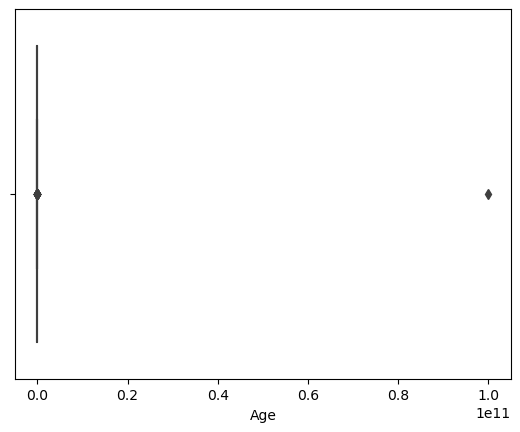

In [16]:
sns.boxplot(x= train.Age)

In [17]:
train.Age.mean()

95419877.71755725

In [18]:
train.Age.median()

31.0

In [19]:
train[train.Age == train.Age.max()]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
390,391,8/27/2014 15:24,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,5-Jan,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


In [20]:
train.Age.replace({train.Age.max(): train.Age.median()}, inplace= True)

In [21]:
train.Age.min()

-1726

In [22]:
train.Age.max()

329

In [23]:
train.Age[train.Age < 0]

143     -29
715   -1726
Name: Age, dtype: int64

In [24]:
train.Age.replace({-29:train.Age.median(), -1726: train.Age.median()}, inplace= True)

In [25]:
train.Age.min()

5

In [26]:
train.Age[train.Age > 100]

364    329
Name: Age, dtype: int64

In [27]:
train.Age.replace({329:train.Age.median()}, inplace= True)

In [28]:
train.Age.max()

65

<Axes: xlabel='Age'>

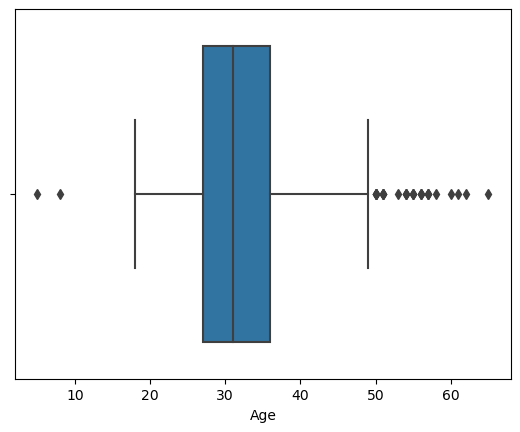

In [29]:
sns.boxplot(x= train.Age)

In [30]:
train.Age[train.Age < 18]

734    5
989    8
Name: Age, dtype: int64

In [31]:
train.Age.replace({5:train.Age.median(), 8: train.Age.median()}, inplace= True)

In [32]:
train[train.Age < 18]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


<Axes: xlabel='Age'>

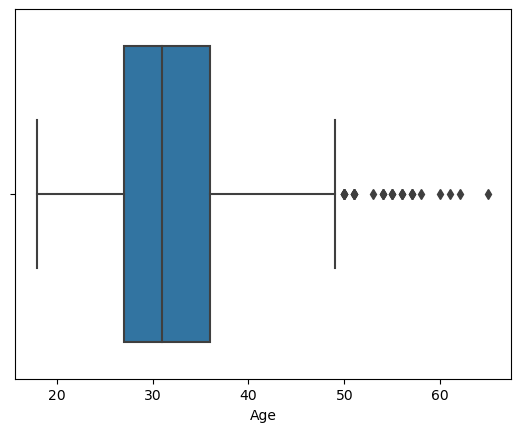

In [33]:
sns.boxplot(x= train.Age)

In [34]:
test.Age.max()

72

In [35]:
test.Age[test.Age < 18]

41    11
78    -1
Name: Age, dtype: int64

In [36]:
test.Age.mean()

32.54761904761905

In [37]:
test.Age.median()

32.0

In [38]:
test.Age.replace({11:test.Age.median(), -1:test.Age.median()}, inplace= True)

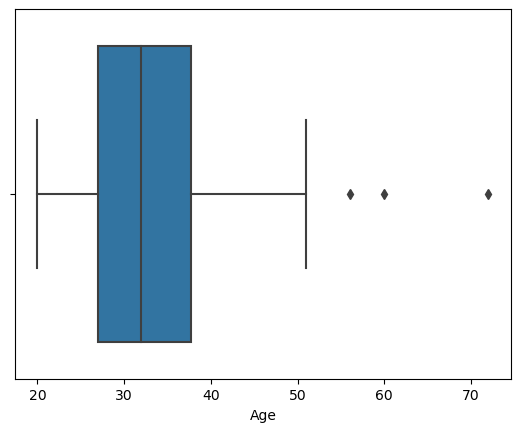

In [39]:
sns.boxplot(x= test.Age)
plt.show()

### Analyzing based on Gender columns

In [40]:
train.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr'], dtype=object)

In [41]:
train.Gender.replace(['M','male','Male-ish','maile','Cis Male','Mal','Male (CIS)','Make','Guy (-ish) ^_^','male leaning androgynous','Male ','Man','msle','Mail','cis male','Malr','m'], 'Male', inplace= True)

In [42]:
train.Gender.unique()

array(['Female', 'Male', 'female', 'Trans-female', 'Cis Female', 'F',
       'something kinda male?', 'Woman', 'f', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Nah', 'All', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Trans woman', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'A little about you'], dtype=object)

In [43]:
train.Gender.replace(['Female','Cis Female','female','F','Woman','f','queer/she/they','Femake','woman','Female ','cis-female/femme','Female (cis)'], 'Female', inplace= True)

In [44]:
train.Gender.unique()

array(['Female', 'Male', 'Trans-female', 'something kinda male?',
       'non-binary', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer',
       'Androgyne', 'Agender', 'Trans woman', 'Neuter', 'Female (trans)',
       'queer', 'A little about you'], dtype=object)

In [45]:
train.Gender.replace(['Trans-female','something kinda male?','non-binary','Nah','All','Enby', 'fluid','Genderqueer', 'Androgyne', 'Agender','Trans woman','Neuter', 'Female (trans)', 'queer','A little about you'], 'Others', inplace= True)

In [46]:
train.Gender.unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [47]:
test.Gender.unique()

array(['Male', 'female', 'Female', 'M', 'male', 'Male ', 'm', 'p', 'F',
       'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means', 'f'],
      dtype=object)

## Country

In [48]:
train.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The'], dtype=object)

In [49]:
test.Country.value_counts()

Country
United States     106
United Kingdom     32
Ireland            14
Netherlands         9
Canada              8
Germany             8
Australia           3
New Zealand         2
Poland              2
Singapore           2
Belgium             2
India               2
France              2
Greece              2
South Africa        2
Czech Republic      1
Brazil              1
China               1
Philippines         1
Italy               1
Bulgaria            1
Sweden              1
Georgia             1
Colombia            1
Israel              1
Moldova             1
Croatia             1
Switzerland         1
Finland             1
Name: count, dtype: int64

In [50]:
train.Country.value_counts()

Country
United States             644
United Kingdom            153
Canada                     64
Germany                    37
Netherlands                18
Australia                  18
Ireland                    13
France                     11
India                       8
New Zealand                 6
Italy                       6
Sweden                      6
Switzerland                 6
Brazil                      5
Poland                      5
Israel                      4
South Africa                4
Belgium                     4
Bulgaria                    3
Mexico                      3
Russia                      3
Austria                     3
Portugal                    2
Denmark                     2
Finland                     2
Singapore                   2
Hungary                     1
Croatia                     1
Nigeria                     1
Thailand                    1
Japan                       1
Norway                      1
Zimbabwe                    1
Bo

In [51]:
train.Country.value_counts().index

Index(['United States', 'United Kingdom', 'Canada', 'Germany', 'Netherlands',
       'Australia', 'Ireland', 'France', 'India', 'New Zealand', 'Italy',
       'Sweden', 'Switzerland', 'Brazil', 'Poland', 'Israel', 'South Africa',
       'Belgium', 'Bulgaria', 'Mexico', 'Russia', 'Austria', 'Portugal',
       'Denmark', 'Finland', 'Singapore', 'Hungary', 'Croatia', 'Nigeria',
       'Thailand', 'Japan', 'Norway', 'Zimbabwe', 'Bosnia and Herzegovina',
       'Uruguay', 'Spain', 'Romania', 'Latvia', 'Colombia', 'Costa Rica',
       'Slovenia', 'Bahamas, The'],
      dtype='object', name='Country')

In [52]:
train.replace([ 'Canada', 'Germany', 'Netherlands',
       'Australia', 'Ireland', 'France', 'India', 'New Zealand', 'Italy',
       'Sweden', 'Switzerland', 'Brazil', 'Poland', 'Israel', 'South Africa',
       'Belgium', 'Bulgaria', 'Mexico', 'Russia', 'Austria', 'Portugal',
       'Denmark', 'Finland', 'Singapore', 'Hungary', 'Croatia', 'Nigeria',
       'Thailand', 'Japan', 'Norway', 'Zimbabwe', 'Bosnia and Herzegovina',
       'Uruguay', 'Spain', 'Romania', 'Latvia', 'Colombia', 'Costa Rica',
       'Slovenia', 'Bahamas, The'], 'Others', inplace= True)

In [53]:
train.Country.value_counts()

Country
United States     644
Others            251
United Kingdom    153
Name: count, dtype: int64

In [54]:
test.Country.value_counts().index

Index(['United States', 'United Kingdom', 'Ireland', 'Netherlands', 'Canada',
       'Germany', 'Australia', 'New Zealand', 'Poland', 'Singapore', 'Belgium',
       'India', 'France', 'Greece', 'South Africa', 'Czech Republic', 'Brazil',
       'China', 'Philippines', 'Italy', 'Bulgaria', 'Sweden', 'Georgia',
       'Colombia', 'Israel', 'Moldova', 'Croatia', 'Switzerland', 'Finland'],
      dtype='object', name='Country')

In [55]:
test.replace(['Ireland', 'Netherlands', 'Canada',
       'Germany', 'Australia', 'New Zealand', 'Poland', 'Singapore', 'Belgium',
       'India', 'France', 'Greece', 'South Africa', 'Czech Republic', 'Brazil',
       'China', 'Philippines', 'Italy', 'Bulgaria', 'Sweden', 'Georgia',
       'Colombia', 'Israel', 'Moldova', 'Croatia', 'Switzerland', 'Finland'], 'Others', inplace= True)

In [56]:
test.Country.value_counts()

Country
United States     106
Others             72
United Kingdom     32
Name: count, dtype: int64

In [57]:
train.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Others,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### State

In [58]:
test.state.value_counts()

state
CA    15
WA    10
NY     8
IN     7
IL     7
TN     6
OH     6
TX     6
FL     5
UT     5
AL     4
NC     4
MN     4
PA     3
NJ     3
OR     3
MI     3
VA     2
WI     2
VT     1
SC     1
OK     1
MD     1
Name: count, dtype: int64

In [59]:
test.state.value_counts().index

Index(['CA', 'WA', 'NY', 'IN', 'IL', 'TN', 'OH', 'TX', 'FL', 'UT', 'AL', 'NC',
       'MN', 'PA', 'NJ', 'OR', 'MI', 'VA', 'WI', 'VT', 'SC', 'OK', 'MD'],
      dtype='object', name='state')

In [60]:
train.state.value_counts()

state
CA    123
WA     60
NY     49
TN     39
TX     38
OR     26
PA     26
OH     24
IL     21
IN     20
MA     20
MI     19
MN     17
VA     12
GA     12
MO     12
NC     10
WI     10
FL     10
CO      9
AZ      7
MD      7
UT      6
OK      5
KY      5
AL      4
IA      4
DC      4
CT      4
SC      4
SD      3
KS      3
NH      3
NV      3
NJ      3
VT      2
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: count, dtype: int64

In [61]:
train.state.unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [62]:
train.state.value_counts().index

Index(['CA', 'WA', 'NY', 'TN', 'TX', 'OR', 'PA', 'OH', 'IL', 'IN', 'MA', 'MI',
       'MN', 'VA', 'GA', 'MO', 'NC', 'WI', 'FL', 'CO', 'AZ', 'MD', 'UT', 'OK',
       'KY', 'AL', 'IA', 'DC', 'CT', 'SC', 'SD', 'KS', 'NH', 'NV', 'NJ', 'VT',
       'WY', 'NM', 'NE', 'WV', 'ID', 'MS', 'RI', 'LA', 'ME'],
      dtype='object', name='state')

In [63]:
train.state.replace(['TN', 'TX', 'OR', 'PA', 'OH', 'IL', 'IN', 'MA', 'MI',
       'MN', 'VA', 'GA', 'MO', 'NC', 'WI', 'FL', 'CO', 'AZ', 'MD', 'UT', 'OK',
       'KY', 'AL', 'IA', 'DC', 'CT', 'SC', 'SD', 'KS', 'NH', 'NV', 'NJ', 'VT',
       'WY', 'NM', 'NE', 'WV', 'ID', 'MS', 'RI', 'LA', 'ME'], 'Others', inplace= True)

In [64]:
train.state.unique()

array(['Others', nan, 'CA', 'NY', 'WA'], dtype=object)

In [65]:
test.state.replace(['IN', 'IL', 'TN', 'OH', 'TX', 'FL', 'UT', 'AL', 'NC','MN', 'PA', 'NJ', 'OR', 'MI', 'VA', 'WI', 'VT', 'SC', 'OK', 'MD'], 'Others', inplace= True)

In [66]:
test.state.unique()

array([nan, 'WA', 'Others', 'CA', 'NY'], dtype=object)

In [67]:
412/train.shape[0]

0.3931297709923664

In [68]:
train.isnull().sum()      ### later after checking the base model accuracy we can drop the state column

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [69]:
train.state.fillna(train.state.mode()[0], inplace= True)

In [70]:
test.state.fillna(test.state.mode()[0], inplace= True)

In [71]:
train.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                          0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

## Self Employed

In [72]:
train.self_employed.value_counts()

self_employed
No     906
Yes    124
Name: count, dtype: int64

In [73]:
train.self_employed.mode()

0    No
Name: self_employed, dtype: object

In [74]:
train.self_employed.isnull().sum()

18

In [75]:
train.self_employed.fillna(train.self_employed.mode()[0], inplace= True)

In [76]:
test.self_employed.isnull().sum()

0

In [77]:
test.self_employed.value_counts()

self_employed
No     189
Yes     21
Name: count, dtype: int64

### Family history

In [78]:
train.family_history.value_counts()

family_history
No     643
Yes    405
Name: count, dtype: int64

In [79]:
train.family_history.isnull().sum()

0

In [80]:
test.family_history.value_counts()

family_history
No     123
Yes     87
Name: count, dtype: int64

In [81]:
test.family_history.isnull().sum()

0

### Work interfere

In [82]:
train.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [83]:
train.work_interfere.isnull().sum()

236

In [84]:
test.work_interfere.unique()

array(['Sometimes', 'Often', 'Never', 'Rarely', nan], dtype=object)

In [85]:
test.work_interfere.isnull().sum()

28

In [86]:
train.work_interfere.fillna(train.work_interfere.mode()[0], inplace= True)
test.work_interfere.fillna(test.work_interfere.mode()[0], inplace= True)

### no_employees

In [87]:
test.no_employees.unique()

array(['5-Jan', 'More than 1000', '26-100', '500-1000', '25-Jun',
       '100-500'], dtype=object)

In [88]:
test.no_employees.value_counts()

no_employees
More than 1000    55
26-100            51
25-Jun            45
5-Jan             28
100-500           26
500-1000           5
Name: count, dtype: int64

In [89]:
train.no_employees.unique()

array(['25-Jun', 'More than 1000', '26-100', '100-500', '5-Jan',
       '500-1000'], dtype=object)

In [90]:
train.groupby('work_interfere')['treatment'].value_counts(normalize = True) * 100

work_interfere  treatment
Never           No           85.955056
                Yes          14.044944
Often           Yes          83.653846
                No           16.346154
Rarely          Yes          72.916667
                No           27.083333
Sometimes       No           52.572347
                Yes          47.427653
Name: proportion, dtype: float64

In [91]:
train.groupby('no_employees')['treatment'].value_counts(normalize = True) * 100

no_employees    treatment
100-500         Yes          52.000000
                No           48.000000
25-Jun          No           57.959184
                Yes          42.040816
26-100          No           50.000000
                Yes          50.000000
5-Jan           Yes          53.383459
                No           46.616541
500-1000        No           56.363636
                Yes          43.636364
More than 1000  Yes          51.541850
                No           48.458150
Name: proportion, dtype: float64

In [92]:
train.no_employees.value_counts()

no_employees
25-Jun            245
26-100            238
More than 1000    227
100-500           150
5-Jan             133
500-1000           55
Name: count, dtype: int64

In [93]:
train.drop('no_employees', axis= 1, inplace= True)
test.drop('no_employees', axis= 1, inplace= True)

In [94]:
train.groupby('self_employed')['treatment'].value_counts(normalize = True) * 100

self_employed  treatment
No             No           51.406926
               Yes          48.593074
Yes            Yes          50.806452
               No           49.193548
Name: proportion, dtype: float64

In [95]:
train.drop('self_employed', axis= 1, inplace= True)
test.drop('self_employed', axis= 1, inplace= True)

In [96]:
train.head()

,S.No,Timestamp,Age,Gender,Country,state,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,Others,No,Yes,Often,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,Male,United States,Others,No,No,Rarely,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Others,Others,No,No,Rarely,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,Others,Yes,Yes,Often,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,Others,No,No,Never,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [97]:
test.head()

,S.No,Timestamp,Age,Gender,Country,state,family_history,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/29/2014 11:32,39,Male,United Kingdom,Others,Yes,Sometimes,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,8/29/2014 11:32,26,female,United States,WA,Yes,Sometimes,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,8/29/2014 11:33,23,Female,United States,Others,Yes,Sometimes,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,8/29/2014 11:34,35,Male,Others,Others,Yes,Often,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,8/29/2014 11:36,36,Male,United States,Others,No,Never,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


In [98]:
train.groupby('family_history')['treatment'].value_counts(normalize = True) * 100

family_history  treatment
No              No           66.407465
                Yes          33.592535
Yes             Yes          73.086420
                No           26.913580
Name: proportion, dtype: float64

In [99]:
train.groupby('remote_work')['treatment'].value_counts(normalize = True) * 100

remote_work  treatment
No           No           52.251023
             Yes          47.748977
Yes          Yes          51.428571
             No           48.571429
Name: proportion, dtype: float64

In [100]:
train.drop('remote_work', axis= 1, inplace= True)
test.drop('remote_work', axis= 1, inplace= True)

In [101]:
train.groupby('tech_company')['treatment'].value_counts(normalize = True) * 100

tech_company  treatment
No            Yes          53.370787
              No           46.629213
Yes           No           52.068966
              Yes          47.931034
Name: proportion, dtype: float64

In [102]:
train.drop('tech_company', axis= 1, inplace= True)
test.drop('tech_company', axis= 1, inplace= True)

In [103]:
train.groupby('benefits')['treatment'].value_counts(normalize = True) * 100

benefits    treatment
Don't know  No           63.829787
            Yes          36.170213
No          No           53.921569
            Yes          46.078431
Yes         Yes          62.250000
            No           37.750000
Name: proportion, dtype: float64

In [104]:
train.groupby('care_options')['treatment'].value_counts(normalize = True) * 100

care_options  treatment
No            No           61.137441
              Yes          38.862559
Not sure      No           60.456274
              Yes          39.543726
Yes           Yes          67.217631
              No           32.782369
Name: proportion, dtype: float64

In [105]:
train.care_options.replace({'Not sure': 'No'}, inplace= True)
test.care_options.replace({'Not sure': 'No'}, inplace= True)

In [106]:
train.head()

,S.No,Timestamp,Age,Gender,Country,state,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,Others,No,Yes,Often,Yes,No,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,Male,United States,Others,No,No,Rarely,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Others,Others,No,No,Rarely,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,Others,Yes,Yes,Often,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,Others,No,No,Never,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [107]:
train.groupby('wellness_program')['treatment'].value_counts(normalize = True) * 100

wellness_program  treatment
Don't know        No           57.861635
                  Yes          42.138365
No                No           51.734104
                  Yes          48.265896
Yes               Yes          57.512953
                  No           42.487047
Name: proportion, dtype: float64

In [108]:
train.groupby('leave')['treatment'].value_counts(normalize = True) * 100

leave               treatment
Don't know          No           56.493506
                    Yes          43.506494
Somewhat difficult  Yes          67.289720
                    No           32.710280
Somewhat easy       No           53.211009
                    Yes          46.788991
Very difficult      Yes          66.666667
                    No           33.333333
Very easy           No           53.409091
                    Yes          46.590909
Name: proportion, dtype: float64

In [109]:
train.leave.isnull().sum()

4

In [110]:
test.leave.isnull().sum()

5

In [111]:
train.leave.fillna(train.leave.mode()[0], inplace= True)
test.leave.fillna(test.leave.mode()[0], inplace= True)

In [112]:
train.leave.replace({'Somewhat easy': 'Very easy', 'Somewhat difficult': 'Very difficult'}, inplace= True)
test.leave.replace({'Somewhat easy': 'Very easy', 'Somewhat difficult': 'Very difficult'}, inplace= True)

In [113]:
train.head()

,S.No,Timestamp,Age,Gender,Country,state,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,Others,No,Yes,Often,Yes,No,No,Yes,Yes,Very easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,Male,United States,Others,No,No,Rarely,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Others,Others,No,No,Rarely,No,No,No,No,Don't know,Very difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,Others,Yes,Yes,Often,No,Yes,No,No,No,Very difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,Others,No,No,Never,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [114]:
train.leave.value_counts()

leave
Don't know        466
Very easy         394
Very difficult    188
Name: count, dtype: int64

In [115]:
train.groupby('mental_health_consequence')['treatment'].value_counts(normalize = True) * 100

mental_health_consequence  treatment
Maybe                      Yes          52.368421
                           No           47.631579
No                         No           60.849057
                           Yes          39.150943
Yes                        Yes          60.245902
                           No           39.754098
Name: proportion, dtype: float64

In [116]:
train.groupby('coworkers')['treatment'].value_counts(normalize = True) * 100

coworkers     treatment
No            No           53.588517
              Yes          46.411483
Some of them  No           51.459293
              Yes          48.540707
Yes           Yes          52.659574
              No           47.340426
Name: proportion, dtype: float64

In [117]:
train.coworkers.replace({'Some of them' : 'No'}, inplace= True)
test.coworkers.replace({'Some of them' : 'No'}, inplace= True)

In [118]:
train.groupby('supervisor')['treatment'].value_counts(normalize = True) * 100

supervisor    treatment
No            Yes          52.812500
              No           47.187500
Some of them  No           50.519031
              Yes          49.480969
Yes           No           54.441913
              Yes          45.558087
Name: proportion, dtype: float64

In [119]:
train.groupby('mental_health_interview')['treatment'].value_counts(normalize = True) * 100

mental_health_interview  treatment
Maybe                    No           62.711864
                         Yes          37.288136
No                       Yes          51.017964
                         No           48.982036
Yes                      Yes          55.555556
                         No           44.444444
Name: proportion, dtype: float64

In [120]:
train.groupby('phys_health_interview')['treatment'].value_counts(normalize = True) * 100

phys_health_interview  treatment
Maybe                  No           55.531453
                       Yes          44.468547
No                     Yes          51.312649
                       No           48.687351
Yes                    Yes          54.761905
                       No           45.238095
Name: proportion, dtype: float64

In [121]:
train.groupby('mental_vs_physical')['treatment'].value_counts(normalize = True) * 100

mental_vs_physical  treatment
Don't know          No           57.112527
                    Yes          42.887473
No                  Yes          57.857143
                    No           42.142857
Yes                 No           50.168350
                    Yes          49.831650
Name: proportion, dtype: float64

In [122]:
train.groupby('obs_consequence')['treatment'].value_counts(normalize = True) * 100

obs_consequence  treatment
No               No           54.767184
                 Yes          45.232816
Yes              Yes          71.232877
                 No           28.767123
Name: proportion, dtype: float64

In [123]:
train.drop('comments', axis= 1, inplace= True)
test.drop('comments', axis= 1, inplace= True)

In [124]:
train.shape

(1048, 23)

In [125]:
test.shape

(210, 22)

In [126]:
train.Gender.unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [127]:
test.Gender.unique()

array(['Male', 'female', 'Female', 'M', 'male', 'Male ', 'm', 'p', 'F',
       'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means', 'f'],
      dtype=object)

In [128]:
test.Gender.replace(['M', 'male', 'Male ', 'm','Cis Man'], 'Male', inplace= True)

In [129]:
test.Gender.replace(['female','F',
       'Woman', 'femail', 'f'], 'Female', inplace= True)

In [130]:
test.Gender.unique()

array(['Male', 'Female', 'p',
       'ostensibly male, unsure what that really means'], dtype=object)

In [131]:
test.Gender.replace(['p',
       'ostensibly male, unsure what that really means'], 'Others', inplace= True)

In [132]:
test.Gender.unique()

array(['Male', 'Female', 'Others'], dtype=object)

In [133]:
train.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'family_history', 'treatment', 'work_interfere', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [134]:
test.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'family_history', 'work_interfere', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [135]:
train.drop('S.No', axis=1, inplace= True)
test.drop('S.No', axis=1, inplace= True)

In [136]:
train.drop('Timestamp', axis=1, inplace= True)
test.drop('Timestamp', axis=1, inplace= True)

In [137]:
train.shape

(1048, 21)

In [138]:
test.shape

(210, 20)

In [139]:
train.drop(['Country','state'], axis=1, inplace= True)
test.drop(['Country','state'], axis=1, inplace= True)

## Encoding

In [140]:
pd.get_dummies(test)

,Age,Gender_Female,Gender_Male,Gender_Others,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,leave_Don't know,leave_Very difficult,leave_Very easy,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,39,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,True
1,26,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,True
2,23,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False
3,35,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False
4,36,False,True,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,26,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False
206,32,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,True,False
207,34,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,True,True,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False
208,46,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False


In [141]:
X = train.drop('treatment', axis= 1)
y = train.treatment

In [142]:
X.head()

,Age,Gender,family_history,work_interfere,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,Often,Yes,No,No,Yes,Yes,Very easy,No,No,No,Yes,No,Maybe,Yes,No
1,44,Male,No,Rarely,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,Rarely,No,No,No,No,Don't know,Very difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,Yes,Often,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Maybe,Maybe,No,Yes
4,31,Male,No,Never,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,No,Yes,Yes,Yes,Don't know,No


In [143]:
y.head()

0    Yes
1     No
2     No
3    Yes
4     No
Name: treatment, dtype: object

In [144]:
X_final = pd.get_dummies(X,drop_first= True).astype(int)

In [145]:
X_final.head()

,Age,Gender_Male,Gender_Others,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,benefits_No,benefits_Yes,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0
1,44,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,32,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
3,31,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
4,31,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0


In [146]:
X_final.shape


(1048, 32)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size= 0.2, random_state= 0)

In [149]:
y_train.replace({'Yes':1, 'No':0}, inplace= True)
y_test.replace({'Yes':1, 'No':0}, inplace= True)

In [150]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [151]:
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

In [152]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred)*100)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       428
           1       0.79      0.75      0.77       410

    accuracy                           0.78       838
   macro avg       0.78      0.78      0.78       838
weighted avg       0.78      0.78      0.78       838

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       108
           1       0.70      0.72      0.71       102

    accuracy                           0.71       210
   macro avg       0.71      0.71      0.71       210
weighted avg       0.71      0.71      0.71       210

Accuracy_Score= 70.95238095238095


In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
model2 = DecisionTreeClassifier(max_depth= 4)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [155]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred)*100)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       428
           1       0.75      0.77      0.76       410

    accuracy                           0.76       838
   macro avg       0.76      0.76      0.76       838
weighted avg       0.76      0.76      0.76       838

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       108
           1       0.60      0.69      0.64       102

    accuracy                           0.63       210
   macro avg       0.63      0.63      0.63       210
weighted avg       0.63      0.63      0.63       210

Accuracy_Score= 62.857142857142854


In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [158]:
y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       410

    accuracy                           1.00       838
   macro avg       1.00      1.00      1.00       838
weighted avg       1.00      1.00      1.00       838

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       108
           1       0.62      0.69      0.65       102

    accuracy                           0.65       210
   macro avg       0.65      0.65      0.65       210
weighted avg       0.65      0.65      0.65       210

Accuracy_Score= 64.76190476190476


In [159]:
final_test = pd.get_dummies(test, drop_first= True)

In [160]:
X_train

,Age,Gender_Male,Gender_Others,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,benefits_No,benefits_Yes,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
190,38,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
879,31,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
825,48,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
1032,40,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
145,37,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,31,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1
763,38,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
835,44,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1
559,24,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0


In [161]:
lis = final_test.columns.to_list()

In [162]:
for i in X_train.columns:
    if i not in lis:
        print(i)

In [163]:
X_train

,Age,Gender_Male,Gender_Others,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,benefits_No,benefits_Yes,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
190,38,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
879,31,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
825,48,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
1032,40,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
145,37,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,31,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1
763,38,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
835,44,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1
559,24,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0


In [164]:
X_train.shape

(838, 32)

In [165]:
output = pd.DataFrame(model3.predict(final_test),columns= ['treatment'])

In [166]:
output.head()

,treatment
0,1
1,1
2,0
3,1
4,0


In [167]:
output.treatment.replace({1: 'Yes',0: 'No'}, inplace= True)

In [168]:
output

,treatment
0,Yes
1,Yes
2,No
3,Yes
4,No
...,...
205,No
206,Yes
207,Yes
208,No


In [169]:
output.to_csv('final_submission.csv',index= False)

In [170]:
pwd

'C:\\Users\\Lenovo\\OneDrive\\Documents\\PGDA43_Python_\\Hackathon'

### Now will Build Different Models with different algorithm and campare with the different models and select the best model 

**a. AdaBoost**

**b. Naïve Bayes**

**c. SVM**

## AdaBoost

In [171]:
from sklearn.ensemble import AdaBoostClassifier


model4 = AdaBoostClassifier()
model4.fit(X_train,y_train)

y_train_pred4 = model4.predict(X_train)
y_test_pred4 = model4.predict(X_test)

print(confusion_matrix(y_train,y_train_pred4))
print(confusion_matrix(y_test,y_test_pred4))
print(classification_report(y_train,y_train_pred4))
print(classification_report(y_test,y_test_pred4))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred4)*100)

[[351  77]
 [104 306]]
[[74 34]
 [28 74]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       428
           1       0.80      0.75      0.77       410

    accuracy                           0.78       838
   macro avg       0.79      0.78      0.78       838
weighted avg       0.78      0.78      0.78       838

              precision    recall  f1-score   support

           0       0.73      0.69      0.70       108
           1       0.69      0.73      0.70       102

    accuracy                           0.70       210
   macro avg       0.71      0.71      0.70       210
weighted avg       0.71      0.70      0.70       210

Accuracy_Score= 70.47619047619048


## Naive Bayes

In [172]:
from sklearn.naive_bayes import GaussianNB

model5 = GaussianNB()
model5.fit(X_train,y_train)

y_train_pred5 = model5.predict(X_train)
y_test_pred5 = model5.predict(X_test)

print(confusion_matrix(y_train,y_train_pred5))
print(confusion_matrix(y_test,y_test_pred5))
print(classification_report(y_train,y_train_pred5))
print(classification_report(y_test,y_test_pred5))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred5)*100)

[[355  73]
 [152 258]]
[[81 27]
 [42 60]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       428
           1       0.78      0.63      0.70       410

    accuracy                           0.73       838
   macro avg       0.74      0.73      0.73       838
weighted avg       0.74      0.73      0.73       838

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       108
           1       0.69      0.59      0.63       102

    accuracy                           0.67       210
   macro avg       0.67      0.67      0.67       210
weighted avg       0.67      0.67      0.67       210

Accuracy_Score= 67.14285714285714


## SVM

In [173]:
from sklearn.svm import SVC

model6 = SVC()
model6.fit(X_train,y_train)

y_train_pred6 = model6.predict(X_train)
y_test_pred6 = model6.predict(X_test)

print(confusion_matrix(y_train,y_train_pred6))
print(confusion_matrix(y_test,y_test_pred6))
print(classification_report(y_train,y_train_pred6))
print(classification_report(y_test,y_test_pred6))

print('Accuracy_Score=',accuracy_score(y_test,y_test_pred6)*100)

[[350  78]
 [224 186]]
[[78 30]
 [64 38]]
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       428
           1       0.70      0.45      0.55       410

    accuracy                           0.64       838
   macro avg       0.66      0.64      0.63       838
weighted avg       0.66      0.64      0.63       838

              precision    recall  f1-score   support

           0       0.55      0.72      0.62       108
           1       0.56      0.37      0.45       102

    accuracy                           0.55       210
   macro avg       0.55      0.55      0.54       210
weighted avg       0.55      0.55      0.54       210

Accuracy_Score= 55.23809523809524
